# (1) 기존 데이터 업로드
- 기준이 되는 DTG 데이터(15개) 불러오기
    - 차원축소 전 DE / 차원축소 후 DE
- Clustering
- 평가지표 구축

# (2) 운전자 평가
- 운전자 데이터 불러오기
- Scoring

In [1361]:
import pandas as pd
import numpy as np
from time import time
import matplotlib.pyplot as plt
import os

In [1362]:
# 차원축소 전 DE array
get_DE = np.load("driving_event_PREV.npy")
driving_event = get_DE
driving_event[0].shape

(15, 3)

In [1363]:
data_DE_df = {
    'driving event data(15X3)' : [driving_event[i] for i in range(len(driving_event))],
    'idx' : [j for j in range(len(driving_event))]
}

In [1364]:
# driving event df
DE_df = pd.DataFrame(data_DE_df)
DE_df

,driving event data(15X3),idx
0,"[[0.0, 0.0, 3.0], [0.0, 0.0, 9.0], [0.0, 0.0, ...",0
1,"[[0.0, 0.0, 9.0], [0.0, 0.0, 9.0], [0.0, 0.0, ...",1
2,"[[0.0, 0.0, 9.0], [0.0, 0.0, -247.0], [0.0, 0....",2
3,"[[0.0, 0.0, -247.0], [0.0, 0.0, 269.0], [0.0, ...",3
4,"[[0.0, 0.0, 269.0], [0.0, 0.0, -269.0], [0.0, ...",4
...,...,...
39860,"[[10.0, -6.0, 8.0], [5.0, -5.0, 5.0], [0.0, -5...",39860
39861,"[[5.0, -5.0, 5.0], [0.0, -5.0, 7.0], [0.0, 0.0...",39861
39862,"[[8.0, -4.0, 3.0], [5.0, -3.0, 3.0], [3.0, -2....",39862
39863,"[[5.0, -3.0, 3.0], [3.0, -2.0, -355.0], [0.0, ...",39863


In [1365]:
# 차원축소 된 DE array
get_DE = np.load("driving_event_DR.npy")
driving_event_DR = get_DE
driving_event_DR[0].shape

(30,)

In [1366]:
data_changed_DE_df = {
    'driving event data(30)' : [driving_event_DR[i] for i in range(len(driving_event_DR))],
    'idx' : [j for j in range(len(driving_event_DR))]
}

In [1367]:
changed_DE_df = pd.DataFrame(data_changed_DE_df)
changed_DE_df

,driving event data(30),idx
0,"[0.5631964, 0.3570503, 0.3486341, 0.4111206, 0...",0
1,"[0.82596385, 0.3451176, 0.16424015, 0.68354446...",1
2,"[0.3401604, 0.46820682, 0.8080732, 0.5400587, ...",2
3,"[0.6577038, 0.5500536, 0.08612047, 0.67866397,...",3
4,"[0.41522866, 0.4977831, 0.15830365, 0.21544863...",4
...,...,...
39860,"[0.35980788, 0.30367425, 0.16662744, 0.3582050...",39860
39861,"[0.5171944, 0.3589975, 0.17263225, 0.31191987,...",39861
39862,"[0.78567827, 0.29146907, 0.031931605, 0.416538...",39862
39863,"[0.7157611, 0.36277217, 0.63600796, 0.45562398...",39863


# K-means Clustering


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=29), k=(1, 30))

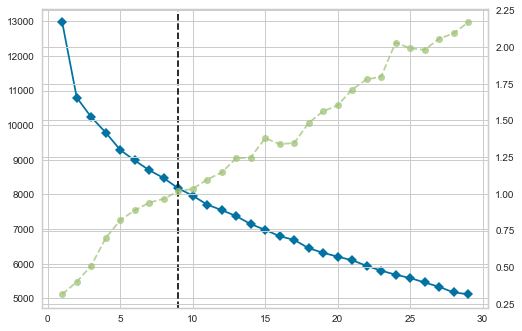

In [1368]:
!pip install yellowbrick
!pip install sklearn

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,30))
visualizer.fit(driving_event_DR)

In [1369]:
# K
K_elbow = visualizer.elbow_value_
K_elbow

9

In [1370]:
# K_value = K_elbow

In [1371]:
# 군집 수 임의로 설정
K_value = 8

In [1372]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(driving_event_DR)

In [1373]:
kmeans = KMeans(n_clusters=K_value, init='k-means++', max_iter=300, random_state=10)
kmeans.fit(data_scale)

KMeans(random_state=10)

In [1374]:
len(kmeans.cluster_centers_)

8

In [1375]:
len(kmeans.labels_)

39865

In [1376]:
changed_DE_df['cluster'] = kmeans.labels_
changed_DE_df

,driving event data(30),idx,cluster
0,"[0.5631964, 0.3570503, 0.3486341, 0.4111206, 0...",0,7
1,"[0.82596385, 0.3451176, 0.16424015, 0.68354446...",1,2
2,"[0.3401604, 0.46820682, 0.8080732, 0.5400587, ...",2,5
3,"[0.6577038, 0.5500536, 0.08612047, 0.67866397,...",3,4
4,"[0.41522866, 0.4977831, 0.15830365, 0.21544863...",4,5
...,...,...,...
39860,"[0.35980788, 0.30367425, 0.16662744, 0.3582050...",39860,6
39861,"[0.5171944, 0.3589975, 0.17263225, 0.31191987,...",39861,6
39862,"[0.78567827, 0.29146907, 0.031931605, 0.416538...",39862,2
39863,"[0.7157611, 0.36277217, 0.63600796, 0.45562398...",39863,7


### 각 Cluster에 해당하는 데이터 인덱스 추출
- ##### cluster_dic

In [1377]:
cluster_dic = {}
    
for i in range(K_value):
    if i not in set(changed_DE_df['cluster'].values):
        cluster_dic[f"cluster_{i}"] = []
    else:
        cluster_dic[f"cluster_{i}"] = list(changed_DE_df.groupby('cluster').get_group(i)['idx'])
    
cluster_dic.keys()

dict_keys(['cluster_0', 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4', 'cluster_5', 'cluster_6', 'cluster_7'])

In [1378]:
# cluster_5 해당하는 인덱스
# cluster_dic['cluster_5']

### Cluster와 Driving Event 데이터 인덱스 매칭
- #### 차원축소된 데이터의 군집화 결과를 기존 데이터와 매치 : 인덱스 이용

In [1379]:
# 기존 데이터(15X3)
DE_df

,driving event data(15X3),idx
0,"[[0.0, 0.0, 3.0], [0.0, 0.0, 9.0], [0.0, 0.0, ...",0
1,"[[0.0, 0.0, 9.0], [0.0, 0.0, 9.0], [0.0, 0.0, ...",1
2,"[[0.0, 0.0, 9.0], [0.0, 0.0, -247.0], [0.0, 0....",2
3,"[[0.0, 0.0, -247.0], [0.0, 0.0, 269.0], [0.0, ...",3
4,"[[0.0, 0.0, 269.0], [0.0, 0.0, -269.0], [0.0, ...",4
...,...,...
39860,"[[10.0, -6.0, 8.0], [5.0, -5.0, 5.0], [0.0, -5...",39860
39861,"[[5.0, -5.0, 5.0], [0.0, -5.0, 7.0], [0.0, 0.0...",39861
39862,"[[8.0, -4.0, 3.0], [5.0, -3.0, 3.0], [3.0, -2....",39862
39863,"[[5.0, -3.0, 3.0], [3.0, -2.0, -355.0], [0.0, ...",39863


In [1380]:
# 차원축소 데이터(30)
changed_DE_df

,driving event data(30),idx,cluster
0,"[0.5631964, 0.3570503, 0.3486341, 0.4111206, 0...",0,7
1,"[0.82596385, 0.3451176, 0.16424015, 0.68354446...",1,2
2,"[0.3401604, 0.46820682, 0.8080732, 0.5400587, ...",2,5
3,"[0.6577038, 0.5500536, 0.08612047, 0.67866397,...",3,4
4,"[0.41522866, 0.4977831, 0.15830365, 0.21544863...",4,5
...,...,...,...
39860,"[0.35980788, 0.30367425, 0.16662744, 0.3582050...",39860,6
39861,"[0.5171944, 0.3589975, 0.17263225, 0.31191987,...",39861,6
39862,"[0.78567827, 0.29146907, 0.031931605, 0.416538...",39862,2
39863,"[0.7157611, 0.36277217, 0.63600796, 0.45562398...",39863,7


### 전체 Cluster 분석
- #### 평균 속도, 평균 가속도, 평균 요레이트

In [1381]:
clusters_total = pd.DataFrame()

for key in cluster_dic.keys():
    total_df = DE_df.iloc[cluster_dic[key]]
    total_df.reset_index(drop=True, inplace=True)
    
    mean_df = pd.DataFrame(total_df['driving event data(15X3)'].mean(), columns=[['velocity', 'acceleration', 'yaw rate']])

    cluster_df = pd.DataFrame(mean_df.mean())
    cluster_df = cluster_df.transpose()
    
    clusters_total = pd.concat([clusters_total, cluster_df])
    
clusters_total.index = list(cluster_dic.keys())

In [1382]:
# 전체 클러스터의 속도, 가속도, 요레이트 평균값 df
clusters_total.to_csv("clusters_total.csv")
clusters_total = clusters_total.round(2)
clusters_total

,velocity,acceleration,yaw rate
cluster_0,23.03,1.42,-0.03
cluster_1,14.86,1.44,14.09
cluster_2,7.98,-0.02,-2.22
cluster_3,39.35,-0.05,-0.04
cluster_4,15.11,1.40,9.99
cluster_5,8.86,0.08,1.50
cluster_6,6.91,-0.54,-0.32
cluster_7,7.11,-0.09,-2.21


### 평가지표
- #### 속도, 가속도, 요레이트에 대한 평가지표 삽입

In [1383]:
clusters_eval = clusters_total.copy()

In [1384]:
# 속도
h_val = clusters_eval['velocity'].quantile(q=0.66).values[0].round(2)
m_val = clusters_eval['velocity'].quantile(q=0.33).values[0].round(2)
print(f"[level] velocity_evaluation \nHigh : {h_val} 이상\n\
Mid : {m_val} 이상 | {h_val} 이하\n\
Low : {m_val} 이하")

[level] velocity_evaluation 
High : 15.01 이상
Mid : 8.25 이상 | 15.01 이하
Low : 8.25 이하


In [1385]:
condition_ls = [
    (clusters_eval['velocity'] >= h_val),
    (clusters_eval['velocity'] >= m_val) & (clusters_eval['velocity'] < h_val),
    (clusters_eval['velocity'] < m_val)
]
choice_ls = ['High', 'Mid', 'Low']

clusters_eval['velocity_eval'] = np.select(condition_ls, choice_ls)

In [1386]:
# 가속도
low_u = clusters_eval['acceleration'].quantile(q=0.85).values[0].round(2)
low_d = clusters_eval['acceleration'].quantile(q=0.15).values[0].round(2)
mid_u = clusters_eval['acceleration'].quantile(q=0.70).values[0].round(2)
mid_d = clusters_eval['acceleration'].quantile(q=0.30).values[0].round(2)
high_u = clusters_eval['acceleration'].quantile(q=0.55).values[0].round(2)
high_d = clusters_eval['acceleration'].quantile(q=0.45).values[0].round(2)
print(f"[danger] acc_safety \nLow : {low_u} 이상  | {low_d} 이하\n\
Mid : {mid_u} 이상  | {mid_d} 이하\n\
High : {high_u} 이상 | {high_d} 이하")

[danger] acc_safety 
Low : 1.42 이상  | -0.09 이하
Mid : 1.27 이상  | -0.05 이하
High : 0.07 이상 | -0.01 이하


In [1387]:
clusters_eval['acc_safety'] = clusters_eval.apply(
    lambda x: 'danger' 
    if (
        ((x['velocity_eval'] == 'Low') & ((x['acceleration'] >= low_u) | (x['acceleration'] <= low_d))) |
        ((x['velocity_eval'] == 'Mid') & ((x['acceleration'] >= mid_u) | (x['acceleration'] <= mid_d))) |
        ((x['velocity_eval'] == 'High') & ((x['acceleration'] >= high_u) | (x['acceleration'] <= high_d)))
       )
    else 'safety', axis='columns')

In [1388]:
# 요레이트
low_u = clusters_eval['yaw rate'].quantile(q=0.85).values[0].round(2)
low_d = clusters_eval['yaw rate'].quantile(q=0.15).values[0].round(2)
mid_u = clusters_eval['yaw rate'].quantile(q=0.70).values[0].round(2)
mid_d = clusters_eval['yaw rate'].quantile(q=0.30).values[0].round(2)
high_u = clusters_eval['yaw rate'].quantile(q=0.55).values[0].round(2)
high_d = clusters_eval['yaw rate'].quantile(q=0.45).values[0].round(2)
print(f"[danger] steer_safety \nLow : {low_u} 이상  | {low_d} 이하\n\
Mid : {mid_u} 이상  | {mid_d} 이하\n\
High : {high_u} 이상 | {high_d} 이하")

[danger] steer_safety 
Low : 9.57 이상  | -2.12 이하
Mid : 1.35 이상  | -0.29 이하
High : -0.03 이상 | -0.04 이하


In [1389]:
clusters_eval['steer_safety'] = clusters_eval.apply(
    lambda x: 'danger' 
    if (
        ((x['velocity_eval'] == 'Low') & ((x['yaw rate'] >= low_u) | (x['yaw rate'] <= low_d))) |
        ((x['velocity_eval'] == 'Mid') & ((x['yaw rate'] >= mid_u) | (x['yaw rate'] <= mid_d))) |
        ((x['velocity_eval'] == 'High') & ((x['yaw rate'] >= high_u) | (x['yaw rate'] <= high_d)))
       )
    else 'safety', axis='columns')

In [1390]:
# 평가지표 삽입
clusters_eval

,velocity,acceleration,yaw rate,velocity_eval,acc_safety,steer_safety
cluster_0,23.03,1.42,-0.03,High,danger,danger
cluster_1,14.86,1.44,14.09,Mid,danger,danger
cluster_2,7.98,-0.02,-2.22,Low,safety,danger
cluster_3,39.35,-0.05,-0.04,High,danger,danger
cluster_4,15.11,1.40,9.99,High,danger,danger
cluster_5,8.86,0.08,1.50,Mid,safety,danger
cluster_6,6.91,-0.54,-0.32,Low,danger,safety
cluster_7,7.11,-0.09,-2.21,Low,danger,danger


### 테스트용 평가지표
- #### 평가지표 임의로 삽입

In [1391]:
# 성능 개선 테스트용
test_eval = clusters_eval.copy()
test_eval['acc_safety'] = ['safety', 'danger', 'danger', 'safety', 'safety', 'danger', 'safety', 'danger']
test_eval['steer_safety'] = ['danger', 'danger', 'safety', 'danger', 'safety', 'danger', 'safety', 'safety']
test_eval

,velocity,acceleration,yaw rate,velocity_eval,acc_safety,steer_safety
cluster_0,23.03,1.42,-0.03,High,safety,danger
cluster_1,14.86,1.44,14.09,Mid,danger,danger
cluster_2,7.98,-0.02,-2.22,Low,danger,safety
cluster_3,39.35,-0.05,-0.04,High,safety,danger
cluster_4,15.11,1.40,9.99,High,safety,safety
cluster_5,8.86,0.08,1.50,Mid,danger,danger
cluster_6,6.91,-0.54,-0.32,Low,safety,safety
cluster_7,7.11,-0.09,-2.21,Low,danger,safety


### Cluster 위험도
- #### 평가지표 기반 위험도 계산

#### (1) 임의로 점수 부여
- ##### low, mid, high : 1점, 2점, 3점
- ##### safety, danger : 1점, 2점

In [1392]:
# 속도
condition_ls = [
    (clusters_eval['velocity_eval'] == 'Low'),
    (clusters_eval['velocity_eval'] == 'Mid'),
    (clusters_eval['velocity_eval'] == 'High'),
]
choice_ls = [1, 2, 3]

vel_score = np.select(condition_ls, choice_ls)

In [1393]:
# 가속도
condition_ls = [
    (clusters_eval['acc_safety'] == 'safety'),
    (clusters_eval['acc_safety'] == 'danger'),
]
choice_ls = [1, 2]

acc_score = np.select(condition_ls, choice_ls)

In [1394]:
# 요레이트
condition_ls = [
    (clusters_eval['steer_safety'] == 'safety'),
    (clusters_eval['steer_safety'] == 'danger'),
]
choice_ls = [1, 2]

steer_score = np.select(condition_ls, choice_ls)

In [1395]:
dangerousness = vel_score * acc_score * steer_score
clusters_eval['dangerousness'] = dangerousness

In [1396]:
clusters_eval

,velocity,acceleration,yaw rate,velocity_eval,acc_safety,steer_safety,dangerousness
cluster_0,23.03,1.42,-0.03,High,danger,danger,12
cluster_1,14.86,1.44,14.09,Mid,danger,danger,8
cluster_2,7.98,-0.02,-2.22,Low,safety,danger,2
cluster_3,39.35,-0.05,-0.04,High,danger,danger,12
cluster_4,15.11,1.40,9.99,High,danger,danger,12
cluster_5,8.86,0.08,1.50,Mid,safety,danger,4
cluster_6,6.91,-0.54,-0.32,Low,danger,safety,2
cluster_7,7.11,-0.09,-2.21,Low,danger,danger,4


#### 테스트용 평가지표의 위험도 계산

In [1740]:
test_eval

,velocity,acceleration,yaw rate,velocity_eval,acc_safety,steer_safety,dangerousness
cluster_0,23.03,1.42,-0.03,High,safety,danger,6
cluster_1,14.86,1.44,14.09,Mid,danger,danger,8
cluster_2,7.98,-0.02,-2.22,Low,danger,safety,2
cluster_3,39.35,-0.05,-0.04,High,safety,danger,6
cluster_4,15.11,1.40,9.99,High,safety,safety,3
cluster_5,8.86,0.08,1.50,Mid,danger,danger,8
cluster_6,6.91,-0.54,-0.32,Low,safety,safety,1
cluster_7,7.11,-0.09,-2.21,Low,danger,safety,2


In [1743]:
test_eval.index = ['cluster 1', 'cluster 2', 'cluster 3', 'cluster 4', 'cluster 5', 'cluster 6', 'cluster 7', 'cluster 8']
test_eval

,velocity,acceleration,yaw rate,velocity_eval,acc_safety,steer_safety,dangerousness
cluster 1,23.03,1.42,-0.03,High,safety,danger,6
cluster 2,14.86,1.44,14.09,Mid,danger,danger,8
cluster 3,7.98,-0.02,-2.22,Low,danger,safety,2
cluster 4,39.35,-0.05,-0.04,High,safety,danger,6
cluster 5,15.11,1.40,9.99,High,safety,safety,3
cluster 6,8.86,0.08,1.50,Mid,danger,danger,8
cluster 7,6.91,-0.54,-0.32,Low,safety,safety,1
cluster 8,7.11,-0.09,-2.21,Low,danger,safety,2


In [1398]:
# 속도
condition_ls2 = [
    (test_eval['velocity_eval'] == 'Low'),
    (test_eval['velocity_eval'] == 'Mid'),
    (test_eval['velocity_eval'] == 'High'),
]
choice_ls2 = [1, 2, 3]

vel_score2 = np.select(condition_ls2, choice_ls2)

In [1399]:
# 가속도
condition_ls2 = [
    (test_eval['acc_safety'] == 'safety'),
    (test_eval['acc_safety'] == 'danger'),
]
choice_ls2 = [1, 2]

acc_score2 = np.select(condition_ls2, choice_ls2)

In [1400]:
# 요레이트
condition_ls2 = [
    (test_eval['steer_safety'] == 'safety'),
    (test_eval['steer_safety'] == 'danger'),
]
choice_ls2 = [1, 2]

steer_score2 = np.select(condition_ls2, choice_ls2)

In [1401]:
dangerousness2 = vel_score2 * acc_score2 * steer_score2
test_eval['dangerousness'] = dangerousness2

In [1402]:
test_eval

,velocity,acceleration,yaw rate,velocity_eval,acc_safety,steer_safety,dangerousness
cluster_0,23.03,1.42,-0.03,High,safety,danger,6
cluster_1,14.86,1.44,14.09,Mid,danger,danger,8
cluster_2,7.98,-0.02,-2.22,Low,danger,safety,2
cluster_3,39.35,-0.05,-0.04,High,safety,danger,6
cluster_4,15.11,1.40,9.99,High,safety,safety,3
cluster_5,8.86,0.08,1.50,Mid,danger,danger,8
cluster_6,6.91,-0.54,-0.32,Low,safety,safety,1
cluster_7,7.11,-0.09,-2.21,Low,danger,safety,2


#### (2) 엔트로피 가중치 사용

In [1403]:
df = clusters_eval.copy()

df = df[['velocity', 'acceleration', 'yaw rate']]
df[df < 0] = -df

In [1404]:
df.dtypes

velocity        float64
acceleration    float64
yaw rate        float64
dtype: object

In [1405]:
# 정규화 및 확률변수로 변환
normal_df = df.apply(lambda x: (x-x.min())/(x.max()-x.min()), axis=0)
normal_df = normal_df.apply(lambda x: (x/x.sum()), axis=0)
normal_df[normal_df == 0] = 1

In [1406]:
# 엔트로피
entropy_df = normal_df.apply(lambda x: ((x*np.log2(x)).sum())/(-np.log2(2000)), axis=0)

In [1407]:
# 다양성의 정도
diversity_df = 1 - entropy_df

In [1408]:
# 가중치
weigth = {'vel_weigth' : diversity_df['velocity'] / diversity_df.sum(),
          'acc_weigth' : diversity_df['acceleration'] / diversity_df.sum(),
          'yaw_weigth' : diversity_df['yaw rate'] / diversity_df.sum()}

In [1409]:
sum(weigth.values())

1.0

In [1410]:
score = df['velocity'].values * weigth['vel_weigth'] +\
        df['acceleration'].values * weigth['acc_weigth'] +\
        df['yaw rate'].values * weigth['yaw_weigth']

score = score.round(2)

In [1411]:
df['score(entropy)'] = score

In [1412]:
clusters_eval_entropy = df.copy()
clusters_eval_entropy

,velocity,acceleration,yaw rate,score(entropy)
cluster_0,23.03,1.42,0.03,8.15
cluster_1,14.86,1.44,14.09,10.18
cluster_2,7.98,0.02,2.22,3.41
cluster_3,39.35,0.05,0.04,13.14
cluster_4,15.11,1.40,9.99,8.87
cluster_5,8.86,0.08,1.50,3.48
cluster_6,6.91,0.54,0.32,2.59
cluster_7,7.11,0.09,2.21,3.14


# 운전자 평가

- ### 새로운 운전자 데이터 사용
- ### DE 파일 업로드
- ### Kmeans predict
- ### 스코어링
- ### 운전자 평가

차량 번호
- driver1:1165
- driver2:1167
- driver3:1194
- driver4:1197
- driver5:1297
- driver6:1344
- driver7:1372
- driver8:1393
- driver9:1420
- driver10:1422
- driver11:1434
- driver12:1491
- driver13:1493
- driver14:1534
- driver15:1584

In [1413]:
text_file_ls = ['20210701-░ц▒т71╣┘1165-S-01-0000001.txt', '20210701-░ц▒т71╣┘1167-S-01-0000001.txt', \
                '20210701-░ц▒т71╣┘1194-S-01-0000001.txt', '20210701-░ц▒т71╣┘1297-S-01-0000001.txt', \
                '20210701-░ц▒т71╣┘1344-S-01-0000001.txt', '20210701-░ц▒т71╣┘1420-S-01-0000001.txt', \
                '20210701-░ц▒т71╣┘1422-S-01-0000001.txt', '20210701-░ц▒т71╣┘1491-S-01-0000001.txt', \
                '20210701-░ц▒т71╣┘1493-S-01-0000001.txt', '20210701-░ц▒т71╣┘1534-S-01-0000001.txt', \
                '20210701_░ц▒т71╣┘1197.txt', '20210701_░ц▒т71╣┘1372.txt', '20210701_░ц▒т71╣┘1393.txt', \
                '20210701_░ц▒т71╣┘1434.txt', '20210701_░ц▒т71╣┘1584.txt']

In [1414]:
dir_ = 'C:\\Users\\tactics\\I-Maas\\DTG\\DTG\\'

# 운전자 데이터 1
- driver_DE_DR_1.npy
- '20210701-░ц▒т71╣┘1165-S-01-0000001.txt'

In [1415]:
text_file = text_file_ls[0]

In [1416]:
input_file = open(dir_+text_file,'r', encoding='cp949')
data = input_file.read()

In [1417]:
print(f"file info : {data[:76]}")

file info : ######DT-202,6.01.930000000000000000011경기71바11651238100831###########0000001


In [1418]:
print(f"car num : {data[44:48]}")

car num : 1165


In [1419]:
row = int((len(data)-76)/68)
print(f"row : {row}")

row : 55502


In [1420]:
# 총 주행거리(km)
distance = int(data[76+(row-1)*68:144+(row-1)*68][4:11]) - int(data[76+(0)*68:144+(0)*68][4:11])
print(f"total distance : {distance}(km)")

total distance : 235(km)


In [1421]:
# 차원 축소 DE : driver_DE_DR_1.npy
driving_event_DR = np.load("driver_DE_DR_1.npy")

In [1422]:
DE_DR_df = {
    'driving event data(30)' : [driving_event_DR[i] for i in range(len(driving_event_DR))],
    'idx' : [j for j in range(len(driving_event_DR))]
}

new_df = pd.DataFrame(DE_DR_df)

In [1423]:
# Kmeans predict
new_data_scale = scaler.fit_transform(driving_event_DR)

new_df['cluster'] = kmeans.predict(new_data_scale)

In [1424]:
# 해당하는 cluster 종류
set(new_df['cluster'].values)

{0, 1, 2, 3, 4, 5, 6, 7}

In [1425]:
cluster_dic = {}
    
for i in range(K_value):
    if i not in new_df['cluster'].values:
        cluster_dic[f"cluster_{i}"] = []
    else:
        cluster_dic[f"cluster_{i}"] = list(new_df.groupby('cluster').get_group(i)['idx'])

In [1426]:
# cluster 별 데이터 개수
cluster_data = list(cluster_dic.values())
cluster_num = [len(e) for e in cluster_data]
cluster_num

[23, 24, 397, 25, 3, 131, 2035, 137]

In [1427]:
# cluster 별 위험도 점수
cluster_scores = clusters_eval['dangerousness'].values.flatten().tolist()
cluster_scores

[12, 8, 2, 12, 12, 4, 2, 4]

In [1428]:
# 운전자 스코어링_1 : 점수 부여 방식
score_1 = 0
for i in range(K_value):
    score_1 += cluster_scores[i] * cluster_num[i]

In [1429]:
# cluster 별 엔트로피 점수
cluster_scores = clusters_eval_entropy['score(entropy)'].values.flatten().tolist()
cluster_scores

[8.15, 10.18, 3.41, 13.14, 8.87, 3.48, 2.59, 3.14]

In [1430]:
# 운전자 스코어링_2 : 엔트로피 가중치 방식
score_2 = 0
for i in range(K_value):
    score_2 += cluster_scores[i] * cluster_num[i]

In [1431]:
# test) cluster 별 위험도 점수 2
cluster_scores2 = test_eval['dangerousness'].values.flatten().tolist()

score_3 = 0
for i in range(K_value):
    score_3 += cluster_scores2[i] * cluster_num[i]

In [1432]:
# 관련성 높은 클러스터
related_cluster = sorted(cluster_dic, key=lambda key:len(cluster_dic[key]), reverse=True)

In [1433]:
# 운전자 평가
# 기존 평가지표 df에서 cluster 해당 내용 매칭
print("DRIVER BEHAVIOR : \n")
for cluster in related_cluster[:3]: # 3위까지
    print(pd.DataFrame(clusters_eval.loc[cluster][['velocity_eval', 'acc_safety', 'steer_safety']]))
    print("\n")

DRIVER BEHAVIOR : 

              cluster_6
velocity_eval       Low
acc_safety       danger
steer_safety     safety


              cluster_2
velocity_eval       Low
acc_safety       safety
steer_safety     danger


              cluster_7
velocity_eval       Low
acc_safety       danger
steer_safety     danger




In [1434]:
# test) cluster 별 위험도 점수 2
cluster_scores2 = test_eval['dangerousness'].values.flatten().tolist()

score_3 = 0
for i in range(K_value):
    score_3 += cluster_scores2[i] * cluster_num[i]

In [1435]:
driver_1 = {
    'score_1' : int(score_1),
    'score/km_1' : int(score_1/distance),
    'score_2' : int(score_2),
    'score/km_2' : int(score_2/distance),
    'test_score' : int(score_3),
    'test_score/km' : int(score_3/distance),
    'related_cluster' : related_cluster
}

# 운전자 데이터 2
- driver_DE_DR_2.npy
- '20210701-░ц▒т71╣┘1167-S-01-0000001.txt'

In [1436]:
text_file = text_file_ls[1]

In [1437]:
input_file = open(dir_+text_file,'r', encoding='cp949')
data = input_file.read()

In [1438]:
print(f"file info : {data[:76]}")

file info : ######DT-202,6.01.930000000000000000011경기71바11671238100831###########0000001


In [1439]:
print(f"car num : {data[44:48]}")

car num : 1167


In [1440]:
row = int((len(data)-76)/68)
print(f"row : {row}")

row : 53346


In [1441]:
# 총 주행거리(km)
distance = int(data[76+(row-1)*68:144+(row-1)*68][4:11]) - int(data[76+(0)*68:144+(0)*68][4:11])
print(f"total distance : {distance}(km)")

total distance : 235(km)


In [1442]:
# 차원 축소 DE : driver_DE_DR_2.npy
driving_event_DR = np.load("driver_DE_DR_2.npy")

In [1443]:
DE_DR_df = {
    'driving event data(30)' : [driving_event_DR[i] for i in range(len(driving_event_DR))],
    'idx' : [j for j in range(len(driving_event_DR))]
}

new_df = pd.DataFrame(DE_DR_df)

In [1444]:
# Kmeans predict
new_data_scale = scaler.fit_transform(driving_event_DR)

new_df['cluster'] = kmeans.predict(new_data_scale)

In [1445]:
# 해당하는 cluster 종류
set(new_df['cluster'].values)

{0, 1, 2, 3, 4, 5, 6, 7}

In [1446]:
cluster_dic = {}
    
for i in range(K_value):
    if i not in new_df['cluster'].values:
        cluster_dic[f"cluster_{i}"] = []
    else:
        cluster_dic[f"cluster_{i}"] = list(new_df.groupby('cluster').get_group(i)['idx'])

In [1447]:
# cluster 별 데이터 개수
cluster_data = list(cluster_dic.values())
cluster_num = [len(e) for e in cluster_data]
cluster_num

[24, 19, 616, 24, 5, 88, 1764, 127]

In [1448]:
# cluster 별 위험도 점수
cluster_scores = clusters_eval['dangerousness'].values.flatten().tolist()
cluster_scores

[12, 8, 2, 12, 12, 4, 2, 4]

In [1449]:
# 운전자 스코어링_1 : 점수 부여 방식
score_1 = 0
for i in range(K_value):
    score_1 += cluster_scores[i] * cluster_num[i]

In [1450]:
# cluster 별 엔트로피 점수
cluster_scores = clusters_eval_entropy['score(entropy)'].values.flatten().tolist()
cluster_scores

[8.15, 10.18, 3.41, 13.14, 8.87, 3.48, 2.59, 3.14]

In [1451]:
# 운전자 스코어링_2 : 엔트로피 가중치 방식
score_2 = 0
for i in range(K_value):
    score_2 += cluster_scores[i] * cluster_num[i]

In [1452]:
# test) cluster 별 위험도 점수 2
cluster_scores2 = test_eval['dangerousness'].values.flatten().tolist()

score_3 = 0
for i in range(K_value):
    score_3 += cluster_scores2[i] * cluster_num[i]

In [1453]:
# 관련성 높은 클러스터
related_cluster = sorted(cluster_dic, key=lambda key:len(cluster_dic[key]), reverse=True)

In [1454]:
# 운전자 평가
# 기존 평가지표 df에서 cluster 해당 내용 매칭
print("DRIVER BEHAVIOR : \n")
for cluster in related_cluster[:3]: # 3위까지
    print(pd.DataFrame(clusters_eval.loc[cluster][['velocity_eval', 'acc_safety', 'steer_safety']]))
    print("\n")

DRIVER BEHAVIOR : 

              cluster_6
velocity_eval       Low
acc_safety       danger
steer_safety     safety


              cluster_2
velocity_eval       Low
acc_safety       safety
steer_safety     danger


              cluster_7
velocity_eval       Low
acc_safety       danger
steer_safety     danger




In [1455]:
# test) cluster 별 위험도 점수 2
cluster_scores2 = test_eval['dangerousness'].values.flatten().tolist()

score_3 = 0
for i in range(K_value):
    score_3 += cluster_scores2[i] * cluster_num[i]

In [1456]:
driver_2 = {
    'score_1' : int(score_1),
    'score/km_1' : int(score_1/distance),
    'score_2' : int(score_2),
    'score/km_2' : int(score_2/distance),
    'test_score' : int(score_3),
    'test_score/km' : int(score_3/distance),
    'related_cluster' : related_cluster
}

# 운전자 데이터 3
- driver_DE_DR_3.npy
- '20210701-░ц▒т71╣┘1194-S-01-0000001.txt'

In [1457]:
text_file = text_file_ls[2]

In [1458]:
input_file = open(dir_+text_file,'r', encoding='cp949')
data = input_file.read()

In [1459]:
print(f"file info : {data[:76]}")

file info : ######DT-202,6.01.850000000000000000011경기71바11941238100831###########0000001


In [1460]:
print(f"car num : {data[44:48]}")

car num : 1194


In [1461]:
row = int((len(data)-76)/68)
print(f"row : {row}")

row : 51337


In [1462]:
# 총 주행거리(km)
distance = int(data[76+(row-1)*68:144+(row-1)*68][4:11]) - int(data[76+(0)*68:144+(0)*68][4:11])
print(f"total distance : {distance}(km)")

total distance : 256(km)


In [1463]:
# 차원 축소 DE : driver_DE_DR_3.npy
driving_event_DR = np.load("driver_DE_DR_3.npy")

In [1464]:
DE_DR_df = {
    'driving event data(30)' : [driving_event_DR[i] for i in range(len(driving_event_DR))],
    'idx' : [j for j in range(len(driving_event_DR))]
}

new_df = pd.DataFrame(DE_DR_df)

In [1465]:
# Kmeans predict
new_data_scale = scaler.fit_transform(driving_event_DR)

new_df['cluster'] = kmeans.predict(new_data_scale)

In [1466]:
# 해당하는 cluster 종류
set(new_df['cluster'].values)

{0, 1, 2, 3, 4, 5, 6, 7}

In [1467]:
cluster_dic = {}
    
for i in range(K_value):
    if i not in new_df['cluster'].values:
        cluster_dic[f"cluster_{i}"] = []
    else:
        cluster_dic[f"cluster_{i}"] = list(new_df.groupby('cluster').get_group(i)['idx'])

In [1468]:
# cluster 별 데이터 개수
cluster_data = list(cluster_dic.values())
cluster_num = [len(e) for e in cluster_data]
cluster_num

[50, 44, 231, 2, 22, 131, 2013, 74]

In [1469]:
# cluster 별 위험도 점수
cluster_scores = clusters_eval['dangerousness'].values.flatten().tolist()
cluster_scores

[12, 8, 2, 12, 12, 4, 2, 4]

In [1470]:
# 운전자 스코어링_1 : 점수 부여 방식
score_1 = 0
for i in range(K_value):
    score_1 += cluster_scores[i] * cluster_num[i]

In [1471]:
# cluster 별 엔트로피 점수
cluster_scores = clusters_eval_entropy['score(entropy)'].values.flatten().tolist()
cluster_scores

[8.15, 10.18, 3.41, 13.14, 8.87, 3.48, 2.59, 3.14]

In [1472]:
# 운전자 스코어링_2 : 엔트로피 가중치 방식
score_2 = 0
for i in range(K_value):
    score_2 += cluster_scores[i] * cluster_num[i]

In [1473]:
# 관련성 높은 클러스터
related_cluster = sorted(cluster_dic, key=lambda key:len(cluster_dic[key]), reverse=True)

In [1474]:
# 운전자 평가
# 기존 평가지표 df에서 cluster 해당 내용 매칭
print("DRIVER BEHAVIOR : \n")
for cluster in related_cluster[:3]: # 3위까지
    print(pd.DataFrame(clusters_eval.loc[cluster][['velocity_eval', 'acc_safety', 'steer_safety']]))
    print("\n")

DRIVER BEHAVIOR : 

              cluster_6
velocity_eval       Low
acc_safety       danger
steer_safety     safety


              cluster_2
velocity_eval       Low
acc_safety       safety
steer_safety     danger


              cluster_5
velocity_eval       Mid
acc_safety       safety
steer_safety     danger




In [1475]:
# test) cluster 별 위험도 점수 2
cluster_scores2 = test_eval['dangerousness'].values.flatten().tolist()

score_3 = 0
for i in range(K_value):
    score_3 += cluster_scores2[i] * cluster_num[i]

In [1476]:
driver_3 = {
    'score_1' : int(score_1),
    'score/km_1' : int(score_1/distance),
    'score_2' : int(score_2),
    'score/km_2' : int(score_2/distance),
    'test_score' : int(score_3),
    'test_score/km' : int(score_3/distance),
    'related_cluster' : related_cluster
}

# 운전자 데이터 4
- driver_DE_DR_4.npy
- '20210701-░ц▒т71╣┘1297-S-01-0000001.txt'

In [1477]:
text_file = text_file_ls[3]

In [1478]:
input_file = open(dir_+text_file,'r', encoding='cp949')
data = input_file.read()

In [1479]:
print(f"file info : {data[:76]}")

file info : ######DT-202,6.01.810000000000000000011경기71바12971238100831###########0000001


In [1480]:
print(f"car num : {data[44:48]}")

car num : 1297


In [1481]:
row = int((len(data)-76)/68)
print(f"row : {row}")

row : 54258


In [1482]:
# 총 주행거리(km)
distance = int(data[76+(row-1)*68:144+(row-1)*68][4:11]) - int(data[76+(0)*68:144+(0)*68][4:11])
print(f"total distance : {distance}(km)")

total distance : 220(km)


In [1483]:
# 차원 축소 DE : driver_DE_DR_4.npy
driving_event_DR = np.load("driver_DE_DR_4.npy")

In [1484]:
DE_DR_df = {
    'driving event data(30)' : [driving_event_DR[i] for i in range(len(driving_event_DR))],
    'idx' : [j for j in range(len(driving_event_DR))]
}

new_df = pd.DataFrame(DE_DR_df)

In [1485]:
# Kmeans predict
new_data_scale = scaler.fit_transform(driving_event_DR)

new_df['cluster'] = kmeans.predict(new_data_scale)

In [1486]:
# 해당하는 cluster 종류
set(new_df['cluster'].values)

{0, 1, 2, 3, 4, 5, 6, 7}

In [1487]:
cluster_dic = {}
    
for i in range(K_value):
    if i not in new_df['cluster'].values:
        cluster_dic[f"cluster_{i}"] = []
    else:
        cluster_dic[f"cluster_{i}"] = list(new_df.groupby('cluster').get_group(i)['idx'])

In [1488]:
# cluster 별 데이터 개수
cluster_data = list(cluster_dic.values())
cluster_num = [len(e) for e in cluster_data]
cluster_num

[28, 173, 422, 9, 6, 122, 1851, 102]

In [1489]:
# cluster 별 위험도 점수
cluster_scores = clusters_eval['dangerousness'].values.flatten().tolist()
cluster_scores

[12, 8, 2, 12, 12, 4, 2, 4]

In [1490]:
# 운전자 스코어링_1 : 점수 부여 방식
score_1 = 0
for i in range(K_value):
    score_1 += cluster_scores[i] * cluster_num[i]

In [1491]:
# cluster 별 엔트로피 점수
cluster_scores = clusters_eval_entropy['score(entropy)'].values.flatten().tolist()
cluster_scores

[8.15, 10.18, 3.41, 13.14, 8.87, 3.48, 2.59, 3.14]

In [1492]:
# 운전자 스코어링_2 : 엔트로피 가중치 방식
score_2 = 0
for i in range(K_value):
    score_2 += cluster_scores[i] * cluster_num[i]

In [1493]:
# 관련성 높은 클러스터
related_cluster = sorted(cluster_dic, key=lambda key:len(cluster_dic[key]), reverse=True)

In [1494]:
# 운전자 평가
# 기존 평가지표 df에서 cluster 해당 내용 매칭
print("DRIVER BEHAVIOR : \n")
for cluster in related_cluster[:3]: # 3위까지
    print(pd.DataFrame(clusters_eval.loc[cluster][['velocity_eval', 'acc_safety', 'steer_safety']]))
    print("\n")

DRIVER BEHAVIOR : 

              cluster_6
velocity_eval       Low
acc_safety       danger
steer_safety     safety


              cluster_2
velocity_eval       Low
acc_safety       safety
steer_safety     danger


              cluster_1
velocity_eval       Mid
acc_safety       danger
steer_safety     danger




In [1495]:
# test) cluster 별 위험도 점수 2
cluster_scores2 = test_eval['dangerousness'].values.flatten().tolist()

score_3 = 0
for i in range(K_value):
    score_3 += cluster_scores2[i] * cluster_num[i]

In [1496]:
driver_4 = {
    'score_1' : int(score_1),
    'score/km_1' : int(score_1/distance),
    'score_2' : int(score_2),
    'score/km_2' : int(score_2/distance),
    'test_score' : int(score_3),
    'test_score/km' : int(score_3/distance),
    'related_cluster' : related_cluster
}

# 운전자 데이터 5
- driver_DE_DR_5.npy
- '20210701-░ц▒т71╣┘1344-S-01-0000001.txt'

In [1497]:
text_file = text_file_ls[4]

In [1498]:
input_file = open(dir_+text_file,'r', encoding='cp949')
data = input_file.read()

In [1499]:
print(f"file info : {data[:76]}")

file info : ######DT-202,6.01.810000000000000000011경기71바13441238100831###########0000001


In [1500]:
print(f"car num : {data[44:48]}")

car num : 1344


In [1501]:
row = int((len(data)-76)/68)
print(f"row : {row}")

row : 65512


In [1502]:
# 총 주행거리(km)
distance = int(data[76+(row-1)*68:144+(row-1)*68][4:11]) - int(data[76+(0)*68:144+(0)*68][4:11])
print(f"total distance : {distance}(km)")

total distance : 273(km)


In [1503]:
# 차원 축소 DE : driver_DE_DR_5.npy
driving_event_DR = np.load("driver_DE_DR_5.npy")

In [1504]:
DE_DR_df = {
    'driving event data(30)' : [driving_event_DR[i] for i in range(len(driving_event_DR))],
    'idx' : [j for j in range(len(driving_event_DR))]
}

new_df = pd.DataFrame(DE_DR_df)

In [1505]:
# Kmeans predict
new_data_scale = scaler.fit_transform(driving_event_DR)

new_df['cluster'] = kmeans.predict(new_data_scale)

In [1506]:
# 해당하는 cluster 종류
set(new_df['cluster'].values)

{0, 1, 2, 3, 4, 5, 6, 7}

In [1507]:
cluster_dic = {}
    
for i in range(K_value):
    if i not in new_df['cluster'].values:
        cluster_dic[f"cluster_{i}"] = []
    else:
        cluster_dic[f"cluster_{i}"] = list(new_df.groupby('cluster').get_group(i)['idx'])

In [1508]:
# cluster 별 데이터 개수
cluster_data = list(cluster_dic.values())
cluster_num = [len(e) for e in cluster_data]
cluster_num

[1598, 140, 109, 10, 41, 88, 1076, 213]

In [1509]:
# cluster 별 위험도 점수
cluster_scores = clusters_eval['dangerousness'].values.flatten().tolist()
cluster_scores

[12, 8, 2, 12, 12, 4, 2, 4]

In [1510]:
# 운전자 스코어링_1 : 점수 부여 방식
score_1 = 0
for i in range(K_value):
    score_1 += cluster_scores[i] * cluster_num[i]

In [1511]:
# cluster 별 엔트로피 점수
cluster_scores = clusters_eval_entropy['score(entropy)'].values.flatten().tolist()
cluster_scores

[8.15, 10.18, 3.41, 13.14, 8.87, 3.48, 2.59, 3.14]

In [1512]:
# 운전자 스코어링_2 : 엔트로피 가중치 방식
score_2 = 0
for i in range(K_value):
    score_2 += cluster_scores[i] * cluster_num[i]

In [1513]:
# 관련성 높은 클러스터
related_cluster = sorted(cluster_dic, key=lambda key:len(cluster_dic[key]), reverse=True)

In [1514]:
# 운전자 평가
# 기존 평가지표 df에서 cluster 해당 내용 매칭
print("DRIVER BEHAVIOR : \n")
for cluster in related_cluster[:3]: # 3위까지
    print(pd.DataFrame(clusters_eval.loc[cluster][['velocity_eval', 'acc_safety', 'steer_safety']]))
    print("\n")

DRIVER BEHAVIOR : 

              cluster_0
velocity_eval      High
acc_safety       danger
steer_safety     danger


              cluster_6
velocity_eval       Low
acc_safety       danger
steer_safety     safety


              cluster_7
velocity_eval       Low
acc_safety       danger
steer_safety     danger




In [1515]:
# test) cluster 별 위험도 점수 2
cluster_scores2 = test_eval['dangerousness'].values.flatten().tolist()

score_3 = 0
for i in range(K_value):
    score_3 += cluster_scores2[i] * cluster_num[i]

In [1516]:
driver_5 = {
    'score_1' : int(score_1),
    'score/km_1' : int(score_1/distance),
    'score_2' : int(score_2),
    'score/km_2' : int(score_2/distance),
    'test_score' : int(score_3),
    'test_score/km' : int(score_3/distance),
    'related_cluster' : related_cluster
}

# 운전자 데이터 6
- driver_DE_DR_6.npy
- '20210701-░ц▒т71╣┘1420-S-01-0000001.txt'

In [1517]:
text_file = text_file_ls[5]

In [1518]:
input_file = open(dir_+text_file,'r', encoding='cp949')
data = input_file.read()

In [1519]:
print(f"file info : {data[:76]}")

file info : ######DT-202,6.01.930000000000000000011경기71바14201238100831###########0000001


In [1520]:
print(f"car num : {data[44:48]}")

car num : 1420


In [1521]:
row = int((len(data)-76)/68)
print(f"row : {row}")

row : 55728


In [1522]:
# 총 주행거리(km)
distance = int(data[76+(row-1)*68:144+(row-1)*68][4:11]) - int(data[76+(0)*68:144+(0)*68][4:11])
print(f"total distance : {distance}(km)")

total distance : 227(km)


In [1523]:
# 차원 축소 DE : driver_DE_DR_6.npy
driving_event_DR = np.load("driver_DE_DR_6.npy")

In [1524]:
DE_DR_df = {
    'driving event data(30)' : [driving_event_DR[i] for i in range(len(driving_event_DR))],
    'idx' : [j for j in range(len(driving_event_DR))]
}

new_df = pd.DataFrame(DE_DR_df)

In [1525]:
# Kmeans predict
new_data_scale = scaler.fit_transform(driving_event_DR)

new_df['cluster'] = kmeans.predict(new_data_scale)

In [1526]:
# 해당하는 cluster 종류
set(new_df['cluster'].values)

{0, 1, 2, 3, 4, 5, 6, 7}

In [1527]:
cluster_dic = {}
    
for i in range(K_value):
    if i not in new_df['cluster'].values:
        cluster_dic[f"cluster_{i}"] = []
    else:
        cluster_dic[f"cluster_{i}"] = list(new_df.groupby('cluster').get_group(i)['idx'])

In [1528]:
# cluster 별 데이터 개수
cluster_data = list(cluster_dic.values())
cluster_num = [len(e) for e in cluster_data]
cluster_num

[31, 2, 115, 6, 4, 783, 1754, 91]

In [1529]:
# cluster 별 위험도 점수
cluster_scores = clusters_eval['dangerousness'].values.flatten().tolist()
cluster_scores

[12, 8, 2, 12, 12, 4, 2, 4]

In [1530]:
# 운전자 스코어링_1 : 점수 부여 방식
score_1 = 0
for i in range(K_value):
    score_1 += cluster_scores[i] * cluster_num[i]

In [1531]:
# cluster 별 엔트로피 점수
cluster_scores = clusters_eval_entropy['score(entropy)'].values.flatten().tolist()
cluster_scores

[8.15, 10.18, 3.41, 13.14, 8.87, 3.48, 2.59, 3.14]

In [1532]:
# 운전자 스코어링_2 : 엔트로피 가중치 방식
score_2 = 0
for i in range(K_value):
    score_2 += cluster_scores[i] * cluster_num[i]

In [1533]:
# 관련성 높은 클러스터
related_cluster = sorted(cluster_dic, key=lambda key:len(cluster_dic[key]), reverse=True)

In [1534]:
# 운전자 평가
# 기존 평가지표 df에서 cluster 해당 내용 매칭
print("DRIVER BEHAVIOR : \n")
for cluster in related_cluster[:3]: # 3위까지
    print(pd.DataFrame(clusters_eval.loc[cluster][['velocity_eval', 'acc_safety', 'steer_safety']]))
    print("\n")

DRIVER BEHAVIOR : 

              cluster_6
velocity_eval       Low
acc_safety       danger
steer_safety     safety


              cluster_5
velocity_eval       Mid
acc_safety       safety
steer_safety     danger


              cluster_2
velocity_eval       Low
acc_safety       safety
steer_safety     danger




In [1535]:
# test) cluster 별 위험도 점수 2
cluster_scores2 = test_eval['dangerousness'].values.flatten().tolist()

score_3 = 0
for i in range(K_value):
    score_3 += cluster_scores2[i] * cluster_num[i]

In [1536]:
driver_6 = {
    'score_1' : int(score_1),
    'score/km_1' : int(score_1/distance),
    'score_2' : int(score_2),
    'score/km_2' : int(score_2/distance),
    'test_score' : int(score_3),
    'test_score/km' : int(score_3/distance),
    'related_cluster' : related_cluster
}

# 운전자 데이터 7
- driver_DE_DR_7.npy
- '20210701-░ц▒т71╣┘1422-S-01-0000001.txt'

In [1537]:
text_file = text_file_ls[6]

In [1538]:
input_file = open(dir_+text_file,'r', encoding='cp949')
data = input_file.read()

In [1539]:
print(f"file info : {data[:76]}")

file info : ######DT-202,6.01.930000000000000000011경기71바14221238100831###########0000001


In [1540]:
print(f"car num : {data[44:48]}")

car num : 1422


In [1541]:
row = int((len(data)-76)/68)
print(f"row : {row}")

row : 50447


In [1542]:
# 총 주행거리(km)
distance = int(data[76+(row-1)*68:144+(row-1)*68][4:11]) - int(data[76+(0)*68:144+(0)*68][4:11])
print(f"total distance : {distance}(km)")

total distance : 229(km)


In [1543]:
# 차원 축소 DE : driver_DE_DR_7.npy
driving_event_DR = np.load("driver_DE_DR_7.npy")

In [1544]:
DE_DR_df = {
    'driving event data(30)' : [driving_event_DR[i] for i in range(len(driving_event_DR))],
    'idx' : [j for j in range(len(driving_event_DR))]
}

new_df = pd.DataFrame(DE_DR_df)

In [1545]:
# Kmeans predict
new_data_scale = scaler.fit_transform(driving_event_DR)

new_df['cluster'] = kmeans.predict(new_data_scale)

In [1546]:
# 해당하는 cluster 종류
set(new_df['cluster'].values)

{0, 1, 2, 3, 4, 5, 6, 7}

In [1547]:
cluster_dic = {}
    
for i in range(K_value):
    if i not in new_df['cluster'].values:
        cluster_dic[f"cluster_{i}"] = []
    else:
        cluster_dic[f"cluster_{i}"] = list(new_df.groupby('cluster').get_group(i)['idx'])

In [1548]:
# cluster 별 데이터 개수
cluster_data = list(cluster_dic.values())
cluster_num = [len(e) for e in cluster_data]
cluster_num

[941, 22, 447, 1, 31, 264, 758, 58]

In [1549]:
# cluster 별 위험도 점수
cluster_scores = clusters_eval['dangerousness'].values.flatten().tolist()
cluster_scores

[12, 8, 2, 12, 12, 4, 2, 4]

In [1550]:
# 운전자 스코어링_1 : 점수 부여 방식
score_1 = 0
for i in range(K_value):
    score_1 += cluster_scores[i] * cluster_num[i]

In [1551]:
# cluster 별 엔트로피 점수
cluster_scores = clusters_eval_entropy['score(entropy)'].values.flatten().tolist()
cluster_scores

[8.15, 10.18, 3.41, 13.14, 8.87, 3.48, 2.59, 3.14]

In [1552]:
# 운전자 스코어링_2 : 엔트로피 가중치 방식
score_2 = 0
for i in range(K_value):
    score_2 += cluster_scores[i] * cluster_num[i]

In [1553]:
# 관련성 높은 클러스터
related_cluster = sorted(cluster_dic, key=lambda key:len(cluster_dic[key]), reverse=True)

In [1554]:
# 운전자 평가
# 기존 평가지표 df에서 cluster 해당 내용 매칭
print("DRIVER BEHAVIOR : \n")
for cluster in related_cluster[:3]: # 3위까지
    print(pd.DataFrame(clusters_eval.loc[cluster][['velocity_eval', 'acc_safety', 'steer_safety']]))
    print("\n")

DRIVER BEHAVIOR : 

              cluster_0
velocity_eval      High
acc_safety       danger
steer_safety     danger


              cluster_6
velocity_eval       Low
acc_safety       danger
steer_safety     safety


              cluster_2
velocity_eval       Low
acc_safety       safety
steer_safety     danger




In [1555]:
# test) cluster 별 위험도 점수 2
cluster_scores2 = test_eval['dangerousness'].values.flatten().tolist()

score_3 = 0
for i in range(K_value):
    score_3 += cluster_scores2[i] * cluster_num[i]

In [1556]:
driver_7 = {
    'score_1' : int(score_1),
    'score/km_1' : int(score_1/distance),
    'score_2' : int(score_2),
    'score/km_2' : int(score_2/distance),
    'test_score' : int(score_3),
    'test_score/km' : int(score_3/distance),
    'related_cluster' : related_cluster
}

# 운전자 데이터 8
- driver_DE_DR_8.npy
- '20210701-░ц▒т71╣┘1491-S-01-0000001.txt'

In [1557]:
text_file = text_file_ls[7]

In [1558]:
input_file = open(dir_+text_file,'r', encoding='cp949')
data = input_file.read()

In [1559]:
print(f"file info : {data[:76]}")

file info : ######DT-202,6.01.810000000000000000011경기71바14911238100831###########0000001


In [1560]:
print(f"car num : {data[44:48]}")

car num : 1491


In [1561]:
row = int((len(data)-76)/68)
print(f"row : {row}")

row : 51143


In [1562]:
# 총 주행거리(km)
distance = int(data[76+(row-1)*68:144+(row-1)*68][4:11]) - int(data[76+(0)*68:144+(0)*68][4:11])
print(f"total distance : {distance}(km)")

total distance : 254(km)


In [1563]:
# 차원 축소 DE : driver_DE_DR_8.npy
driving_event_DR = np.load("driver_DE_DR_8.npy")

In [1564]:
DE_DR_df = {
    'driving event data(30)' : [driving_event_DR[i] for i in range(len(driving_event_DR))],
    'idx' : [j for j in range(len(driving_event_DR))]
}

new_df = pd.DataFrame(DE_DR_df)

In [1565]:
# Kmeans predict
new_data_scale = scaler.fit_transform(driving_event_DR)

new_df['cluster'] = kmeans.predict(new_data_scale)

In [1566]:
# 해당하는 cluster 종류
set(new_df['cluster'].values)

{0, 1, 2, 3, 4, 5, 6, 7}

In [1567]:
cluster_dic = {}
    
for i in range(K_value):
    if i not in new_df['cluster'].values:
        cluster_dic[f"cluster_{i}"] = []
    else:
        cluster_dic[f"cluster_{i}"] = list(new_df.groupby('cluster').get_group(i)['idx'])

In [1568]:
# cluster 별 데이터 개수
cluster_data = list(cluster_dic.values())
cluster_num = [len(e) for e in cluster_data]
cluster_num

[41, 95, 131, 1, 18, 135, 1875, 261]

In [1569]:
# cluster 별 위험도 점수
cluster_scores = clusters_eval['dangerousness'].values.flatten().tolist()
cluster_scores

[12, 8, 2, 12, 12, 4, 2, 4]

In [1570]:
# 운전자 스코어링_1 : 점수 부여 방식
score_1 = 0
for i in range(K_value):
    score_1 += cluster_scores[i] * cluster_num[i]

In [1571]:
# cluster 별 엔트로피 점수
cluster_scores = clusters_eval_entropy['score(entropy)'].values.flatten().tolist()
cluster_scores

[8.15, 10.18, 3.41, 13.14, 8.87, 3.48, 2.59, 3.14]

In [1572]:
# 운전자 스코어링_2 : 엔트로피 가중치 방식
score_2 = 0
for i in range(K_value):
    score_2 += cluster_scores[i] * cluster_num[i]

In [1573]:
# 관련성 높은 클러스터
related_cluster = sorted(cluster_dic, key=lambda key:len(cluster_dic[key]), reverse=True)

In [1574]:
# 운전자 평가
# 기존 평가지표 df에서 cluster 해당 내용 매칭
print("DRIVER BEHAVIOR : \n")
for cluster in related_cluster[:3]: # 3위까지
    print(pd.DataFrame(clusters_eval.loc[cluster][['velocity_eval', 'acc_safety', 'steer_safety']]))
    print("\n")

DRIVER BEHAVIOR : 

              cluster_6
velocity_eval       Low
acc_safety       danger
steer_safety     safety


              cluster_7
velocity_eval       Low
acc_safety       danger
steer_safety     danger


              cluster_5
velocity_eval       Mid
acc_safety       safety
steer_safety     danger




In [1575]:
# test) cluster 별 위험도 점수 2
cluster_scores2 = test_eval['dangerousness'].values.flatten().tolist()

score_3 = 0
for i in range(K_value):
    score_3 += cluster_scores2[i] * cluster_num[i]

In [1576]:
driver_8 = {
    'score_1' : int(score_1),
    'score/km_1' : int(score_1/distance),
    'score_2' : int(score_2),
    'score/km_2' : int(score_2/distance),
    'test_score' : int(score_3),
    'test_score/km' : int(score_3/distance),
    'related_cluster' : related_cluster
}

# 운전자 데이터 9
- driver_DE_DR_9.npy
- '20210701-░ц▒т71╣┘1493-S-01-0000001.txt'

In [1577]:
text_file = text_file_ls[8]

In [1578]:
input_file = open(dir_+text_file,'r', encoding='cp949')
data = input_file.read()

In [1579]:
print(f"file info : {data[:76]}")

file info : ######DT-202,6.01.810000000000000000011경기71바14931238100831###########0000001


In [1580]:
print(f"car num : {data[44:48]}")

car num : 1493


In [1581]:
row = int((len(data)-76)/68)
print(f"row : {row}")

row : 50168


In [1582]:
# 총 주행거리(km)
distance = int(data[76+(row-1)*68:144+(row-1)*68][4:11]) - int(data[76+(0)*68:144+(0)*68][4:11])
print(f"total distance : {distance}(km)")

total distance : 253(km)


In [1583]:
# 차원 축소 DE : driver_DE_DR_9.npy
driving_event_DR = np.load("driver_DE_DR_9.npy")

In [1584]:
DE_DR_df = {
    'driving event data(30)' : [driving_event_DR[i] for i in range(len(driving_event_DR))],
    'idx' : [j for j in range(len(driving_event_DR))]
}

new_df = pd.DataFrame(DE_DR_df)

In [1585]:
# Kmeans predict
new_data_scale = scaler.fit_transform(driving_event_DR)

new_df['cluster'] = kmeans.predict(new_data_scale)

In [1586]:
# 해당하는 cluster 종류
set(new_df['cluster'].values)

{0, 1, 2, 3, 4, 5, 6, 7}

In [1587]:
cluster_dic = {}
    
for i in range(K_value):
    if i not in new_df['cluster'].values:
        cluster_dic[f"cluster_{i}"] = []
    else:
        cluster_dic[f"cluster_{i}"] = list(new_df.groupby('cluster').get_group(i)['idx'])

In [1588]:
# cluster 별 데이터 개수
cluster_data = list(cluster_dic.values())
cluster_num = [len(e) for e in cluster_data]
cluster_num

[26, 19, 120, 32, 1, 114, 1938, 258]

In [1589]:
# cluster 별 위험도 점수
cluster_scores = clusters_eval['dangerousness'].values.flatten().tolist()
cluster_scores

[12, 8, 2, 12, 12, 4, 2, 4]

In [1590]:
# 운전자 스코어링_1 : 점수 부여 방식
score_1 = 0
for i in range(K_value):
    score_1 += cluster_scores[i] * cluster_num[i]

In [1591]:
# cluster 별 엔트로피 점수
cluster_scores = clusters_eval_entropy['score(entropy)'].values.flatten().tolist()
cluster_scores

[8.15, 10.18, 3.41, 13.14, 8.87, 3.48, 2.59, 3.14]

In [1592]:
# 운전자 스코어링_2 : 엔트로피 가중치 방식
score_2 = 0
for i in range(K_value):
    score_2 += cluster_scores[i] * cluster_num[i]

In [1593]:
# 관련성 높은 클러스터
related_cluster = sorted(cluster_dic, key=lambda key:len(cluster_dic[key]), reverse=True)

In [1594]:
# 운전자 평가
# 기존 평가지표 df에서 cluster 해당 내용 매칭
print("DRIVER BEHAVIOR : \n")
for cluster in related_cluster[:3]: # 3위까지
    print(pd.DataFrame(clusters_eval.loc[cluster][['velocity_eval', 'acc_safety', 'steer_safety']]))
    print("\n")

DRIVER BEHAVIOR : 

              cluster_6
velocity_eval       Low
acc_safety       danger
steer_safety     safety


              cluster_7
velocity_eval       Low
acc_safety       danger
steer_safety     danger


              cluster_2
velocity_eval       Low
acc_safety       safety
steer_safety     danger




In [1595]:
# test) cluster 별 위험도 점수 2
cluster_scores2 = test_eval['dangerousness'].values.flatten().tolist()

score_3 = 0
for i in range(K_value):
    score_3 += cluster_scores2[i] * cluster_num[i]

In [1596]:
driver_9 = {
    'score_1' : int(score_1),
    'score/km_1' : int(score_1/distance),
    'score_2' : int(score_2),
    'score/km_2' : int(score_2/distance),
    'test_score' : int(score_3),
    'test_score/km' : int(score_3/distance),
    'related_cluster' : related_cluster
}

# 운전자 데이터 10
- driver_DE_DR_10.npy
- '20210701-░ц▒т71╣┘1534-S-01-0000001.txt'

In [1597]:
text_file = text_file_ls[9]

In [1598]:
input_file = open(dir_+text_file,'r', encoding='cp949')
data = input_file.read()

In [1599]:
print(f"file info : {data[:76]}")

file info : ######DT-202,6.01.930000000000000000011경기71바15341238106591###########0000001


In [1600]:
print(f"car num : {data[44:48]}")

car num : 1534


In [1601]:
row = int((len(data)-76)/68)
print(f"row : {row}")

row : 52939


In [1602]:
# 총 주행거리(km)
distance = int(data[76+(row-1)*68:144+(row-1)*68][4:11]) - int(data[76+(0)*68:144+(0)*68][4:11])
print(f"total distance : {distance}(km)")

total distance : 243(km)


In [1603]:
# 차원 축소 DE : driver_DE_DR_10.npy
driving_event_DR = np.load("driver_DE_DR_10.npy")

In [1604]:
DE_DR_df = {
    'driving event data(30)' : [driving_event_DR[i] for i in range(len(driving_event_DR))],
    'idx' : [j for j in range(len(driving_event_DR))]
}

new_df = pd.DataFrame(DE_DR_df)

In [1605]:
# Kmeans predict
new_data_scale = scaler.fit_transform(driving_event_DR)

new_df['cluster'] = kmeans.predict(new_data_scale)

In [1606]:
# 해당하는 cluster 종류
set(new_df['cluster'].values)

{0, 1, 2, 3, 4, 5, 6, 7}

In [1607]:
cluster_dic = {}
    
for i in range(K_value):
    if i not in new_df['cluster'].values:
        cluster_dic[f"cluster_{i}"] = []
    else:
        cluster_dic[f"cluster_{i}"] = list(new_df.groupby('cluster').get_group(i)['idx'])

In [1608]:
# cluster 별 데이터 개수
cluster_data = list(cluster_dic.values())
cluster_num = [len(e) for e in cluster_data]
cluster_num

[77, 17, 292, 13, 8, 174, 1569, 497]

In [1609]:
# cluster 별 위험도 점수
cluster_scores = clusters_eval['dangerousness'].values.flatten().tolist()
cluster_scores

[12, 8, 2, 12, 12, 4, 2, 4]

In [1610]:
# 운전자 스코어링_1 : 점수 부여 방식
score_1 = 0
for i in range(K_value):
    score_1 += cluster_scores[i] * cluster_num[i]

In [1611]:
# cluster 별 엔트로피 점수
cluster_scores = clusters_eval_entropy['score(entropy)'].values.flatten().tolist()
cluster_scores

[8.15, 10.18, 3.41, 13.14, 8.87, 3.48, 2.59, 3.14]

In [1612]:
# 운전자 스코어링_2 : 엔트로피 가중치 방식
score_2 = 0
for i in range(K_value):
    score_2 += cluster_scores[i] * cluster_num[i]

In [1613]:
# 관련성 높은 클러스터
related_cluster = sorted(cluster_dic, key=lambda key:len(cluster_dic[key]), reverse=True)

In [1614]:
# 운전자 평가
# 기존 평가지표 df에서 cluster 해당 내용 매칭
print("DRIVER BEHAVIOR : \n")
for cluster in related_cluster[:3]: # 3위까지
    print(pd.DataFrame(clusters_eval.loc[cluster][['velocity_eval', 'acc_safety', 'steer_safety']]))
    print("\n")

DRIVER BEHAVIOR : 

              cluster_6
velocity_eval       Low
acc_safety       danger
steer_safety     safety


              cluster_7
velocity_eval       Low
acc_safety       danger
steer_safety     danger


              cluster_2
velocity_eval       Low
acc_safety       safety
steer_safety     danger




In [1615]:
# test) cluster 별 위험도 점수 2
cluster_scores2 = test_eval['dangerousness'].values.flatten().tolist()

score_3 = 0
for i in range(K_value):
    score_3 += cluster_scores2[i] * cluster_num[i]

In [1616]:
driver_10 = {
    'score_1' : int(score_1),
    'score/km_1' : int(score_1/distance),
    'score_2' : int(score_2),
    'score/km_2' : int(score_2/distance),
    'test_score' : int(score_3),
    'test_score/km' : int(score_3/distance),
    'related_cluster' : related_cluster
}

# 운전자 데이터 11
- driver_DE_DR_11.npy
- '20210701-░ц▒т71╣┘1197-S-01-0000001.txt'

In [1617]:
text_file = text_file_ls[10]

In [1618]:
input_file = open(dir_+text_file,'r', encoding='cp949')
data = input_file.read()

In [1619]:
print(f"file info : {data[:76]}")

file info : ############ODR-1200KMJTA18LPAC00747911경기71바11971238100831######Not_00000000


In [1620]:
print(f"car num : {data[44:48]}")

car num : 1197


In [1621]:
row = int((len(data)-76)/68)
print(f"row : {row}")

row : 54374


In [1622]:
# 총 주행거리(km)
distance = int(data[76+(row-1)*68:144+(row-1)*68][4:11]) - int(data[76+(0)*68:144+(0)*68][4:11])
print(f"total distance : {distance}(km)")

total distance : 234(km)


In [1623]:
# 차원 축소 DE : driver_DE_DR_11.npy
driving_event_DR = np.load("driver_DE_DR_11.npy")

In [1624]:
DE_DR_df = {
    'driving event data(30)' : [driving_event_DR[i] for i in range(len(driving_event_DR))],
    'idx' : [j for j in range(len(driving_event_DR))]
}

new_df = pd.DataFrame(DE_DR_df)

In [1625]:
# Kmeans predict
new_data_scale = scaler.fit_transform(driving_event_DR)

new_df['cluster'] = kmeans.predict(new_data_scale)

In [1626]:
# 해당하는 cluster 종류
set(new_df['cluster'].values)

{0, 1, 2, 4, 5, 6, 7}

In [1627]:
cluster_dic = {}
    
for i in range(K_value):
    if i not in new_df['cluster'].values:
        cluster_dic[f"cluster_{i}"] = []
    else:
        cluster_dic[f"cluster_{i}"] = list(new_df.groupby('cluster').get_group(i)['idx'])

In [1628]:
# cluster 별 데이터 개수
cluster_data = list(cluster_dic.values())
cluster_num = [len(e) for e in cluster_data]
cluster_num

[1, 9, 396, 0, 2, 1187, 242, 881]

In [1629]:
# cluster 별 위험도 점수
cluster_scores = clusters_eval['dangerousness'].values.flatten().tolist()
cluster_scores

[12, 8, 2, 12, 12, 4, 2, 4]

In [1630]:
# 운전자 스코어링_1 : 점수 부여 방식
score_1 = 0
for i in range(K_value):
    score_1 += cluster_scores[i] * cluster_num[i]

In [1631]:
# cluster 별 엔트로피 점수
cluster_scores = clusters_eval_entropy['score(entropy)'].values.flatten().tolist()
cluster_scores

[8.15, 10.18, 3.41, 13.14, 8.87, 3.48, 2.59, 3.14]

In [1632]:
# 운전자 스코어링_2 : 엔트로피 가중치 방식
score_2 = 0
for i in range(K_value):
    score_2 += cluster_scores[i] * cluster_num[i]

In [1633]:
# 관련성 높은 클러스터
related_cluster = sorted(cluster_dic, key=lambda key:len(cluster_dic[key]), reverse=True)

In [1634]:
# 운전자 평가
# 기존 평가지표 df에서 cluster 해당 내용 매칭
print("DRIVER BEHAVIOR : \n")
for cluster in related_cluster[:3]: # 3위까지
    print(pd.DataFrame(clusters_eval.loc[cluster][['velocity_eval', 'acc_safety', 'steer_safety']]))
    print("\n")

DRIVER BEHAVIOR : 

              cluster_5
velocity_eval       Mid
acc_safety       safety
steer_safety     danger


              cluster_7
velocity_eval       Low
acc_safety       danger
steer_safety     danger


              cluster_2
velocity_eval       Low
acc_safety       safety
steer_safety     danger




In [1635]:
# test) cluster 별 위험도 점수 2
cluster_scores2 = test_eval['dangerousness'].values.flatten().tolist()

score_3 = 0
for i in range(K_value):
    score_3 += cluster_scores2[i] * cluster_num[i]

In [1636]:
driver_11 = {
    'score_1' : int(score_1),
    'score/km_1' : int(score_1/distance),
    'score_2' : int(score_2),
    'score/km_2' : int(score_2/distance),
    'test_score' : int(score_3),
    'test_score/km' : int(score_3/distance),
    'related_cluster' : related_cluster
}

# 운전자 데이터 12
- driver_DE_DR_12.npy
- '20210701-░ц▒т71╣┘1372-S-01-0000001.txt'

In [1637]:
text_file = text_file_ls[11]

In [1638]:
input_file = open(dir_+text_file,'r', encoding='cp949')
data = input_file.read()

In [1639]:
print(f"file info : {data[:76]}")

file info : ############ODR-12001111111111111111111경기71바13720000000000######Not_00000000


In [1640]:
print(f"car num : {data[44:48]}")

car num : 1372


In [1641]:
row = int((len(data)-76)/68)
print(f"row : {row}")

row : 52853


In [1642]:
# 총 주행거리(km)
distance = int(data[76+(row-1)*68:144+(row-1)*68][4:11]) - int(data[76+(0)*68:144+(0)*68][4:11])
print(f"total distance : {distance}(km)")

total distance : 204(km)


In [1643]:
# 차원 축소 DE : driver_DE_DR_12.npy
driving_event_DR = np.load("driver_DE_DR_12.npy")

In [1644]:
DE_DR_df = {
    'driving event data(30)' : [driving_event_DR[i] for i in range(len(driving_event_DR))],
    'idx' : [j for j in range(len(driving_event_DR))]
}

new_df = pd.DataFrame(DE_DR_df)

In [1645]:
# Kmeans predict
new_data_scale = scaler.fit_transform(driving_event_DR)

new_df['cluster'] = kmeans.predict(new_data_scale)

In [1646]:
# 해당하는 cluster 종류
set(new_df['cluster'].values)

{0, 1, 2, 4, 5, 6, 7}

In [1647]:
cluster_dic = {}
    
for i in range(K_value):
    if i not in new_df['cluster'].values:
        cluster_dic[f"cluster_{i}"] = []
    else:
        cluster_dic[f"cluster_{i}"] = list(new_df.groupby('cluster').get_group(i)['idx'])

In [1648]:
# cluster 별 데이터 개수
cluster_data = list(cluster_dic.values())
cluster_num = [len(e) for e in cluster_data]
cluster_num

[2, 30, 1897, 0, 4, 354, 78, 277]

In [1649]:
# cluster 별 위험도 점수
cluster_scores = clusters_eval['dangerousness'].values.flatten().tolist()
cluster_scores

[12, 8, 2, 12, 12, 4, 2, 4]

In [1650]:
# 운전자 스코어링_1 : 점수 부여 방식
score_1 = 0
for i in range(K_value):
    score_1 += cluster_scores[i] * cluster_num[i]

In [1651]:
# cluster 별 엔트로피 점수
cluster_scores = clusters_eval_entropy['score(entropy)'].values.flatten().tolist()
cluster_scores

[8.15, 10.18, 3.41, 13.14, 8.87, 3.48, 2.59, 3.14]

In [1652]:
# 운전자 스코어링_2 : 엔트로피 가중치 방식
score_2 = 0
for i in range(K_value):
    score_2 += cluster_scores[i] * cluster_num[i]

In [1653]:
# 관련성 높은 클러스터
related_cluster = sorted(cluster_dic, key=lambda key:len(cluster_dic[key]), reverse=True)

In [1654]:
# 운전자 평가
# 기존 평가지표 df에서 cluster 해당 내용 매칭
print("DRIVER BEHAVIOR : \n")
for cluster in related_cluster[:3]: # 3위까지
    print(pd.DataFrame(clusters_eval.loc[cluster][['velocity_eval', 'acc_safety', 'steer_safety']]))
    print("\n")

DRIVER BEHAVIOR : 

              cluster_2
velocity_eval       Low
acc_safety       safety
steer_safety     danger


              cluster_5
velocity_eval       Mid
acc_safety       safety
steer_safety     danger


              cluster_7
velocity_eval       Low
acc_safety       danger
steer_safety     danger




In [1655]:
# test) cluster 별 위험도 점수 2
cluster_scores2 = test_eval['dangerousness'].values.flatten().tolist()

score_3 = 0
for i in range(K_value):
    score_3 += cluster_scores2[i] * cluster_num[i]

In [1656]:
driver_12 = {
    'score_1' : int(score_1),
    'score/km_1' : int(score_1/distance),
    'score_2' : int(score_2),
    'score/km_2' : int(score_2/distance),
    'test_score' : int(score_3),
    'test_score/km' : int(score_3/distance),
    'related_cluster' : related_cluster
}

# 운전자 데이터 13
- driver_DE_DR_13.npy
- '20210701-░ц▒т71╣┘1393-S-01-0000001.txt'

In [1657]:
text_file = text_file_ls[12]

In [1658]:
input_file = open(dir_+text_file,'r', encoding='cp949')
data = input_file.read()

In [1659]:
print(f"file info : {data[:76]}")

file info : ############ODR-1200#################11경기71바13930000000000000000000000000000


In [1660]:
print(f"car num : {data[44:48]}")

car num : 1393


In [1661]:
row = int((len(data)-76)/68)
print(f"row : {row}")

row : 51891


In [1662]:
# 총 주행거리(km)
distance = int(data[76+(row-1)*68:144+(row-1)*68][4:11]) - int(data[76+(0)*68:144+(0)*68][4:11])
print(f"total distance : {distance}(km)")

total distance : 263(km)


In [1663]:
# 차원 축소 DE : driver_DE_DR_13.npy
driving_event_DR = np.load("driver_DE_DR_13.npy")

In [1664]:
DE_DR_df = {
    'driving event data(30)' : [driving_event_DR[i] for i in range(len(driving_event_DR))],
    'idx' : [j for j in range(len(driving_event_DR))]
}

new_df = pd.DataFrame(DE_DR_df)

In [1665]:
# Kmeans predict
new_data_scale = scaler.fit_transform(driving_event_DR)

new_df['cluster'] = kmeans.predict(new_data_scale)

In [1666]:
# 해당하는 cluster 종류
set(new_df['cluster'].values)

{1, 2, 4, 5, 6, 7}

In [1667]:
cluster_dic = {}
    
for i in range(K_value):
    if i not in new_df['cluster'].values:
        cluster_dic[f"cluster_{i}"] = []
    else:
        cluster_dic[f"cluster_{i}"] = list(new_df.groupby('cluster').get_group(i)['idx'])

In [1668]:
# cluster 별 데이터 개수
cluster_data = list(cluster_dic.values())
cluster_num = [len(e) for e in cluster_data]
cluster_num

[0, 20, 1013, 0, 96, 859, 279, 327]

In [1669]:
# cluster 별 위험도 점수
cluster_scores = clusters_eval['dangerousness'].values.flatten().tolist()
cluster_scores

[12, 8, 2, 12, 12, 4, 2, 4]

In [1670]:
# 운전자 스코어링_1 : 점수 부여 방식
score_1 = 0
for i in range(K_value):
    score_1 += cluster_scores[i] * cluster_num[i]

In [1671]:
# cluster 별 엔트로피 점수
cluster_scores = clusters_eval_entropy['score(entropy)'].values.flatten().tolist()
cluster_scores

[8.15, 10.18, 3.41, 13.14, 8.87, 3.48, 2.59, 3.14]

In [1672]:
# 운전자 스코어링_2 : 엔트로피 가중치 방식
score_2 = 0
for i in range(K_value):
    score_2 += cluster_scores[i] * cluster_num[i]

In [1673]:
# 관련성 높은 클러스터
related_cluster = sorted(cluster_dic, key=lambda key:len(cluster_dic[key]), reverse=True)

In [1674]:
# 운전자 평가
# 기존 평가지표 df에서 cluster 해당 내용 매칭
print("DRIVER BEHAVIOR : \n")
for cluster in related_cluster[:3]: # 3위까지
    print(pd.DataFrame(clusters_eval.loc[cluster][['velocity_eval', 'acc_safety', 'steer_safety']]))
    print("\n")

DRIVER BEHAVIOR : 

              cluster_2
velocity_eval       Low
acc_safety       safety
steer_safety     danger


              cluster_5
velocity_eval       Mid
acc_safety       safety
steer_safety     danger


              cluster_7
velocity_eval       Low
acc_safety       danger
steer_safety     danger




In [1675]:
# test) cluster 별 위험도 점수 2
cluster_scores2 = test_eval['dangerousness'].values.flatten().tolist()

score_3 = 0
for i in range(K_value):
    score_3 += cluster_scores2[i] * cluster_num[i]

In [1676]:
driver_13 = {
    'score_1' : int(score_1),
    'score/km_1' : int(score_1/distance),
    'score_2' : int(score_2),
    'score/km_2' : int(score_2/distance),
    'test_score' : int(score_3),
    'test_score/km' : int(score_3/distance),
    'related_cluster' : related_cluster
}

# 운전자 데이터 14
- driver_DE_DR_14.npy
- '20210701-░ц▒т71╣┘1434-S-01-0000001.txt'

In [1677]:
text_file = text_file_ls[13]

In [1678]:
input_file = open(dir_+text_file,'r', encoding='cp949')
data = input_file.read()

In [1679]:
print(f"file info : {data[:76]}")

file info : ############ODR-1200#################11경기71바14340000000000######Not_00000000


In [1680]:
print(f"car num : {data[44:48]}")

car num : 1434


In [1681]:
row = int((len(data)-76)/68)
print(f"row : {row}")

row : 48371


In [1682]:
# 총 주행거리(km)
distance = int(data[76+(row-1)*68:144+(row-1)*68][4:11]) - int(data[76+(0)*68:144+(0)*68][4:11])
print(f"total distance : {distance}(km)")

total distance : 218(km)


In [1683]:
# 차원 축소 DE : driver_DE_DR_14.npy
driving_event_DR = np.load("driver_DE_DR_14.npy")

In [1684]:
DE_DR_df = {
    'driving event data(30)' : [driving_event_DR[i] for i in range(len(driving_event_DR))],
    'idx' : [j for j in range(len(driving_event_DR))]
}

new_df = pd.DataFrame(DE_DR_df)

In [1685]:
# Kmeans predict
new_data_scale = scaler.fit_transform(driving_event_DR)

new_df['cluster'] = kmeans.predict(new_data_scale)

In [1686]:
# 해당하는 cluster 종류
set(new_df['cluster'].values)

{0, 1, 2, 4, 5, 6, 7}

In [1687]:
cluster_dic = {}
    
for i in range(K_value):
    if i not in new_df['cluster'].values:
        cluster_dic[f"cluster_{i}"] = []
    else:
        cluster_dic[f"cluster_{i}"] = list(new_df.groupby('cluster').get_group(i)['idx'])

In [1688]:
# cluster 별 데이터 개수
cluster_data = list(cluster_dic.values())
cluster_num = [len(e) for e in cluster_data]
cluster_num

[23, 91, 236, 0, 11, 167, 1559, 331]

In [1689]:
# cluster 별 위험도 점수
cluster_scores = clusters_eval['dangerousness'].values.flatten().tolist()
cluster_scores

[12, 8, 2, 12, 12, 4, 2, 4]

In [1690]:
# 운전자 스코어링_1 : 점수 부여 방식
score_1 = 0
for i in range(K_value):
    score_1 += cluster_scores[i] * cluster_num[i]

In [1691]:
# cluster 별 엔트로피 점수
cluster_scores = clusters_eval_entropy['score(entropy)'].values.flatten().tolist()
cluster_scores

[8.15, 10.18, 3.41, 13.14, 8.87, 3.48, 2.59, 3.14]

In [1692]:
# 운전자 스코어링_2 : 엔트로피 가중치 방식
score_2 = 0
for i in range(K_value):
    score_2 += cluster_scores[i] * cluster_num[i]

In [1693]:
# 관련성 높은 클러스터
related_cluster = sorted(cluster_dic, key=lambda key:len(cluster_dic[key]), reverse=True)

In [1694]:
# 운전자 평가
# 기존 평가지표 df에서 cluster 해당 내용 매칭
print("DRIVER BEHAVIOR : \n")
for cluster in related_cluster[:3]: # 3위까지
    print(pd.DataFrame(clusters_eval.loc[cluster][['velocity_eval', 'acc_safety', 'steer_safety']]))
    print("\n")

DRIVER BEHAVIOR : 

              cluster_6
velocity_eval       Low
acc_safety       danger
steer_safety     safety


              cluster_7
velocity_eval       Low
acc_safety       danger
steer_safety     danger


              cluster_2
velocity_eval       Low
acc_safety       safety
steer_safety     danger




In [1695]:
# test) cluster 별 위험도 점수 2
cluster_scores2 = test_eval['dangerousness'].values.flatten().tolist()

score_3 = 0
for i in range(K_value):
    score_3 += cluster_scores2[i] * cluster_num[i]

In [1696]:
driver_14 = {
    'score_1' : int(score_1),
    'score/km_1' : int(score_1/distance),
    'score_2' : int(score_2),
    'score/km_2' : int(score_2/distance),
    'test_score' : int(score_3),
    'test_score/km' : int(score_3/distance),
    'related_cluster' : related_cluster
}

# 운전자 데이터 15
- driver_DE_DR_15.npy
- '20210701-░ц▒т71╣┘1584-S-01-0000001.txt'

In [1697]:
text_file = text_file_ls[14]

In [1698]:
input_file = open(dir_+text_file,'r', encoding='cp949')
data = input_file.read()

In [1699]:
print(f"file info : {data[:76]}")

file info : ############GNC-2000KMJTA18GP7C01274711경기71바15841238106591000000000000000000


In [1700]:
print(f"car num : {data[44:48]}")

car num : 1584


In [1701]:
row = int((len(data)-76)/68)
print(f"row : {row}")

row : 56123


In [1702]:
# 총 주행거리(km)
distance = int(data[76+(row-1)*68:144+(row-1)*68][4:11]) - int(data[76+(0)*68:144+(0)*68][4:11])
print(f"total distance : {distance}(km)")

total distance : 538(km)


In [1703]:
# 차원 축소 DE : driver_DE_DR_15.npy
driving_event_DR = np.load("driver_DE_DR_15.npy")

In [1704]:
DE_DR_df = {
    'driving event data(30)' : [driving_event_DR[i] for i in range(len(driving_event_DR))],
    'idx' : [j for j in range(len(driving_event_DR))]
}

new_df = pd.DataFrame(DE_DR_df)

In [1705]:
# Kmeans predict
new_data_scale = scaler.fit_transform(driving_event_DR)

new_df['cluster'] = kmeans.predict(new_data_scale)

In [1706]:
# 해당하는 cluster 종류
set(new_df['cluster'].values)

{0, 1, 2, 4, 5, 6, 7}

In [1707]:
cluster_dic = {}
    
for i in range(K_value):
    if i not in new_df['cluster'].values:
        cluster_dic[f"cluster_{i}"] = []
    else:
        cluster_dic[f"cluster_{i}"] = list(new_df.groupby('cluster').get_group(i)['idx'])

In [1708]:
# cluster 별 데이터 개수
cluster_data = list(cluster_dic.values())
cluster_num = [len(e) for e in cluster_data]
cluster_num

[5, 12, 258, 0, 19, 1714, 751, 47]

In [1709]:
# cluster 별 위험도 점수
cluster_scores = clusters_eval['dangerousness'].values.flatten().tolist()
cluster_scores

[12, 8, 2, 12, 12, 4, 2, 4]

In [1710]:
# 운전자 스코어링_1 : 점수 부여 방식
score_1 = 0
for i in range(K_value):
    score_1 += cluster_scores[i] * cluster_num[i]

In [1711]:
# cluster 별 엔트로피 점수
cluster_scores = clusters_eval_entropy['score(entropy)'].values.flatten().tolist()
cluster_scores

[8.15, 10.18, 3.41, 13.14, 8.87, 3.48, 2.59, 3.14]

In [1712]:
# 운전자 스코어링_2 : 엔트로피 가중치 방식
score_2 = 0
for i in range(K_value):
    score_2 += cluster_scores[i] * cluster_num[i]

In [1713]:
# 관련성 높은 클러스터
related_cluster = sorted(cluster_dic, key=lambda key:len(cluster_dic[key]), reverse=True)

In [1714]:
# 운전자 평가
# 기존 평가지표 df에서 cluster 해당 내용 매칭
print("DRIVER BEHAVIOR : \n")
for cluster in related_cluster[:3]: # 3위까지
    print(pd.DataFrame(clusters_eval.loc[cluster][['velocity_eval', 'acc_safety', 'steer_safety']]))
    print("\n")

DRIVER BEHAVIOR : 

              cluster_5
velocity_eval       Mid
acc_safety       safety
steer_safety     danger


              cluster_6
velocity_eval       Low
acc_safety       danger
steer_safety     safety


              cluster_2
velocity_eval       Low
acc_safety       safety
steer_safety     danger




In [1715]:
# test) cluster 별 위험도 점수 2
cluster_scores2 = test_eval['dangerousness'].values.flatten().tolist()

score_3 = 0
for i in range(K_value):
    score_3 += cluster_scores2[i] * cluster_num[i]

In [1716]:
driver_15 = {
    'score_1' : int(score_1),
    'score/km_1' : int(score_1/distance),
    'score_2' : int(score_2),
    'score/km_2' : int(score_2/distance),
    'test_score' : int(score_3),
    'test_score/km' : int(score_3/distance),
    'related_cluster' : related_cluster
}

# 운전자 데이터 12
- driver_DE_DR_12.npy
- '20210701-░ц▒т71╣┘1372-S-01-0000001.txt'

In [1717]:
text_file = text_file_ls[11]

In [1718]:
input_file = open(dir_+text_file,'r', encoding='cp949')
data = input_file.read()

In [1719]:
print(f"file info : {data[:76]}")

file info : ############ODR-12001111111111111111111경기71바13720000000000######Not_00000000


In [1720]:
print(f"car num : {data[44:48]}")

car num : 1372


In [1721]:
row = int((len(data)-76)/68)
print(f"row : {row}")

row : 52853


In [1722]:
# 총 주행거리(km)
distance = int(data[76+(row-1)*68:144+(row-1)*68][4:11]) - int(data[76+(0)*68:144+(0)*68][4:11])
print(f"total distance : {distance}(km)")

total distance : 204(km)


In [1723]:
# 차원 축소 DE : driver_DE_DR_12.npy
driving_event_DR = np.load("driver_DE_DR_12.npy")

In [1724]:
DE_DR_df = {
    'driving event data(30)' : [driving_event_DR[i] for i in range(len(driving_event_DR))],
    'idx' : [j for j in range(len(driving_event_DR))]
}

new_df = pd.DataFrame(DE_DR_df)

In [1725]:
# Kmeans predict
new_data_scale = scaler.fit_transform(driving_event_DR)

new_df['cluster'] = kmeans.predict(new_data_scale)

In [1726]:
# 해당하는 cluster 종류
set(new_df['cluster'].values)

{0, 1, 2, 4, 5, 6, 7}

In [1727]:
cluster_dic = {}
    
for i in range(K_value):
    if i not in new_df['cluster'].values:
        cluster_dic[f"cluster_{i}"] = []
    else:
        cluster_dic[f"cluster_{i}"] = list(new_df.groupby('cluster').get_group(i)['idx'])

In [1728]:
# cluster 별 데이터 개수
cluster_data = list(cluster_dic.values())
cluster_num = [len(e) for e in cluster_data]
cluster_num

[2, 30, 1897, 0, 4, 354, 78, 277]

In [1729]:
# cluster 별 위험도 점수
cluster_scores = clusters_eval['dangerousness'].values.flatten().tolist()
cluster_scores

[12, 8, 2, 12, 12, 4, 2, 4]

In [1730]:
# 운전자 스코어링_1 : 점수 부여 방식
score_1 = 0
for i in range(K_value):
    score_1 += cluster_scores[i] * cluster_num[i]

In [1731]:
# cluster 별 엔트로피 점수
cluster_scores = clusters_eval_entropy['score(entropy)'].values.flatten().tolist()
cluster_scores

[8.15, 10.18, 3.41, 13.14, 8.87, 3.48, 2.59, 3.14]

In [1732]:
# 운전자 스코어링_2 : 엔트로피 가중치 방식
score_2 = 0
for i in range(K_value):
    score_2 += cluster_scores[i] * cluster_num[i]

In [1733]:
# 관련성 높은 클러스터
related_cluster = sorted(cluster_dic, key=lambda key:len(cluster_dic[key]), reverse=True)

In [1734]:
# 운전자 평가
# 기존 평가지표 df에서 cluster 해당 내용 매칭
print("DRIVER BEHAVIOR : \n")
for cluster in related_cluster[:3]: # 3위까지
    print(pd.DataFrame(clusters_eval.loc[cluster][['velocity_eval', 'acc_safety', 'steer_safety']]))
    print("\n")

DRIVER BEHAVIOR : 

              cluster_2
velocity_eval       Low
acc_safety       safety
steer_safety     danger


              cluster_5
velocity_eval       Mid
acc_safety       safety
steer_safety     danger


              cluster_7
velocity_eval       Low
acc_safety       danger
steer_safety     danger




In [1735]:
# test) cluster 별 위험도 점수 2
cluster_scores2 = test_eval['dangerousness'].values.flatten().tolist()

score_3 = 0
for i in range(K_value):
    score_3 += cluster_scores2[i] * cluster_num[i]

In [1736]:
driver_12 = {
    'score_1' : int(score_1),
    'score/km_1' : int(score_1/distance),
    'score_2' : int(score_2),
    'score/km_2' : int(score_2/distance),
    'test_score' : int(score_3),
    'test_score/km' : int(score_3/distance),
    'related_cluster' : related_cluster
}

# 운전자 평가 결과 비교

In [1737]:
driver_ls = [driver_1, driver_2, driver_3, driver_4, driver_5, driver_6, driver_7, driver_8, \
             driver_9, driver_10, driver_11, driver_12, driver_13, driver_14, driver_15]

In [1738]:
for i in range(len(driver_ls)):
    print(f"\
[DRIVER {i+1}]\n\
SCORE 1 : {driver_ls[i]['score_1']}      |      \
SCORE 1 PER KM : {driver_ls[i]['score/km_1']}\n\
SCORE 2 : {driver_ls[i]['score_2']}      |      \
SCORE 2 PER KM : {driver_ls[i]['score/km_2']}\n\
TEST SCORE : {driver_ls[i]['test_score']}   |   \
TEST SCORE PER KM : {driver_ls[i]['test_score/km']}\n")

[DRIVER 1]
SCORE 1 : 6740      |      SCORE 1 PER KM : 28
SCORE 2 : 8297      |      SCORE 2 PER KM : 35
TEST SCORE : 4640   |   TEST SCORE PER KM : 19

[DRIVER 2]
SCORE 1 : 6408      |      SCORE 1 PER KM : 27
SCORE 2 : 8123      |      SCORE 2 PER KM : 34
TEST SCORE : 4409   |   TEST SCORE PER KM : 18

[DRIVER 3]
SCORE 1 : 6548      |      SCORE 1 PER KM : 25
SCORE 2 : 7766      |      SCORE 2 PER KM : 30
TEST SCORE : 4401   |   TEST SCORE PER KM : 17

[DRIVER 4]
SCORE 1 : 7342      |      SCORE 1 PER KM : 33
SCORE 2 : 9138      |      SCORE 2 PER KM : 41
TEST SCORE : 5499   |   TEST SCORE PER KM : 24

[DRIVER 5]
SCORE 1 : 24482      |      SCORE 1 PER KM : 89
SCORE 2 : 19077      |      SCORE 2 PER KM : 69
TEST SCORE : 13315   |   TEST SCORE PER KM : 48

[DRIVER 6]
SCORE 1 : 7742      |      SCORE 1 PER KM : 34
SCORE 2 : 8332      |      SCORE 2 PER KM : 36
TEST SCORE : 8680   |   TEST SCORE PER KM : 38

[DRIVER 7]
SCORE 1 : 15550      |      SCORE 1 PER KM : 67
SCORE 2 : 12769     